In [1]:
import pandas as pd
import numpy as np
from ElexonDataPortal import api

client = api.Client('nuleglpsx1yoizp')

In [2]:
end_date = pd.Timestamp.now()
start_date = end_date - pd.Timedelta(hours=0.5)

# start_date = '2024-01-01 0:00'
# end_date = '2024-01-01 1:30'

df_PHYBMDATA = client.get_PHYBMDATA(start_date, end_date)

c:\Users\alyden\AppData\Local\miniforge3\envs\pypsa-lmp\Lib\site-packages\ElexonDataPortal\dev\utils.py:119: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  df_dates_SPs = df_dates_SPs[start_date:end_date]
PHYBMDATA:   0%|          | 0/1 [00:00<?, ?it/s]

PHYBMDATA: 100%|██████████| 1/1 [00:48<00:00, 48.78s/it]
c:\Users\alyden\AppData\Local\miniforge3\envs\pypsa-lmp\Lib\site-packages\ElexonDataPortal\dev\utils.py:119: FutureWarning: Indexing a timezone-aware DatetimeIndex with a timezone-naive datetime is deprecated and will raise KeyError in a future version. Use a timezone-aware object instead.
  df_dates_SPs = df_dates_SPs[start_date:end_date]


In [3]:
df_PHYBMDATA.index = df_PHYBMDATA['bmUnitID']
df_PHYBMDATA

,local_datetime,recordType,bmUnitID,bMUnitType,leadPartyName,ngcBMUnitName,settlementDate,settlementPeriod,timeFrom,pnLevelFrom,...,milLevelTo,bidOfferAcceptanceNumber,acceptanceTime,deemedBidOfferFlag,soFlag,storProviderFlag,rrInstructionFlag,rrScheduleFlag,bidOfferLevelFrom,bidOfferLevelTo
bmUnitID,,,,,,,,,,,,,,,,,,,,,
2__AANGE001,2024-02-01 15:30:00+00:00,PN,2__AANGE001,S,Limejump Energy Limited,AG-ALIM02,2024-02-01,32,2024-02-01 15:30:00,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2__AANGE001,2024-02-01 15:30:00+00:00,PN,2__AANGE001,S,Limejump Energy Limited,AG-ALIM02,2024-02-01,32,2024-02-01 15:35:00,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2__AANGE001,2024-02-01 15:30:00+00:00,PN,2__AANGE001,S,Limejump Energy Limited,AG-ALIM02,2024-02-01,32,2024-02-01 15:40:00,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2__AANGE001,2024-02-01 15:30:00+00:00,PN,2__AANGE001,S,Limejump Energy Limited,AG-ALIM02,2024-02-01,32,2024-02-01 15:45:00,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2__AANGE001,2024-02-01 15:30:00+00:00,PN,2__AANGE001,S,Limejump Energy Limited,AG-ALIM02,2024-02-01,32,2024-02-01 15:55:00,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T_WBURB-1,2024-02-01 15:30:00+00:00,BOALF,T_WBURB-1,T,West Burton B Limited,WBURB-1,2024-02-01,32,2024-02-01 15:35:00,NaN,...,NaN,136880,2024-02-01 15:27:00,F,F,F,F,F,150.000,150.000
T_WBURB-1,2024-02-01 15:30:00+00:00,BOALF,T_WBURB-1,T,West Burton B Limited,WBURB-1,2024-02-01,32,2024-02-01 15:45:00,NaN,...,NaN,136880,2024-02-01 15:27:00,F,F,F,F,F,150.000,431.000
T_WBURB-1,2024-02-01 15:30:00+00:00,BOALF,T_WBURB-1,T,West Burton B Limited,WBURB-1,2024-02-01,32,2024-02-01 15:58:00,NaN,...,NaN,136881,2024-02-01 15:56:00,F,F,F,F,F,431.000,230.000


<Axes: title={'center': 'Final Physical Notification Level (MW)'}, xlabel='bmUnitID'>

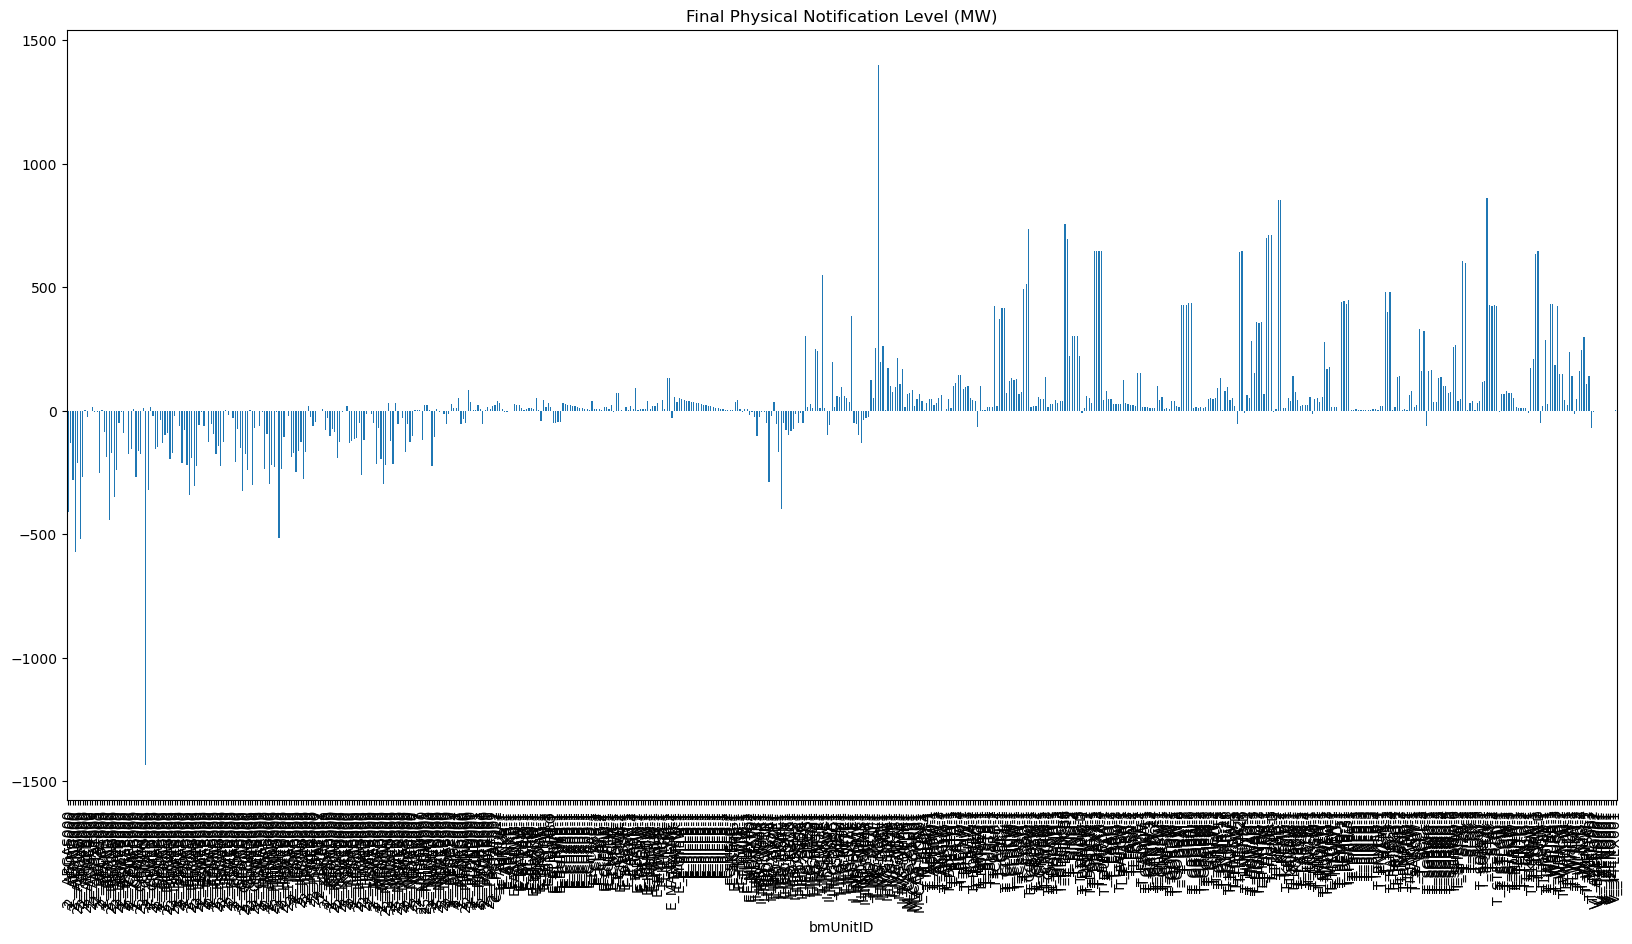

In [33]:
df_data = df_PHYBMDATA[['bMUnitType', 'pnLevelTo', 'activeFlag', 'melLevelTo', 'milLevelTo', 'bidOfferLevelTo']]
# df_data['pnLevelTo'].plot(kind='bar', stacked=True, figsize=(20, 10))
ds_plot = df_data['pnLevelTo'].dropna().astype('float')
ds_plot[ds_plot != 0].plot(kind='bar', figsize=(20, 10), title='Final Physical Notification Level (MW)')

<Axes: title={'center': 'Final Physical Notification Level (MW) > 0  (Generation)'}, xlabel='bmUnitID'>

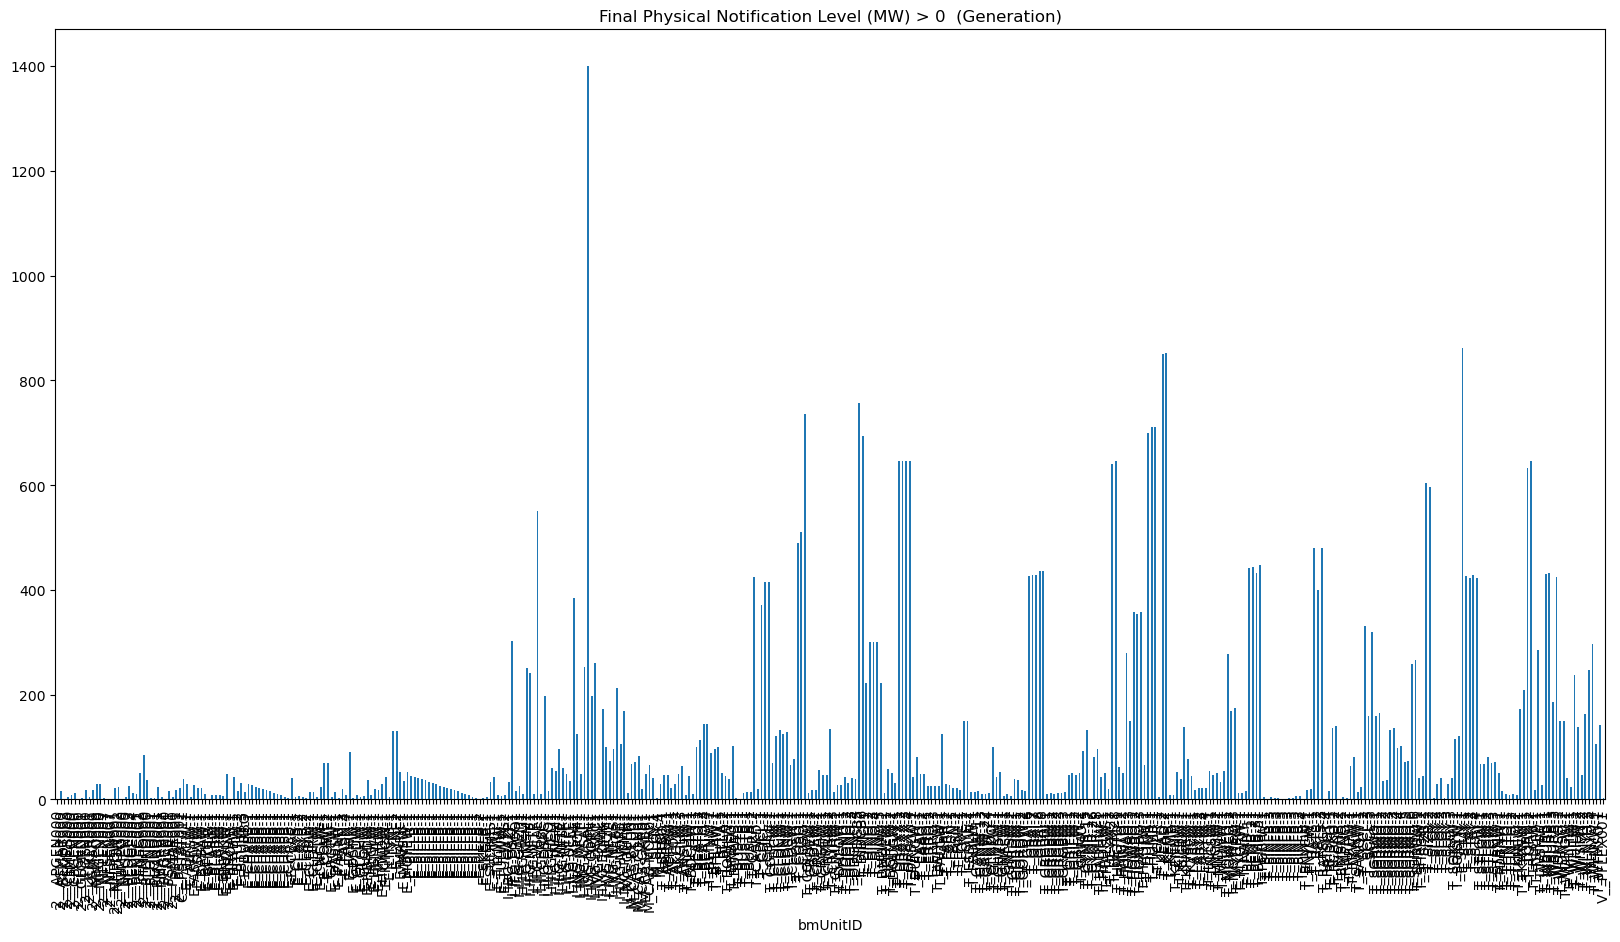

In [34]:
ds_plot[ds_plot > 0].plot(kind='bar', figsize=(20, 10), title='Final Physical Notification Level (MW) > 0  (Generation)')

In [29]:
ds_plot[ds_plot > 0].sum()

48461.0

<Axes: title={'center': 'Final Physical Notification Level (MW) < 0  (Demand)'}, xlabel='bmUnitID'>

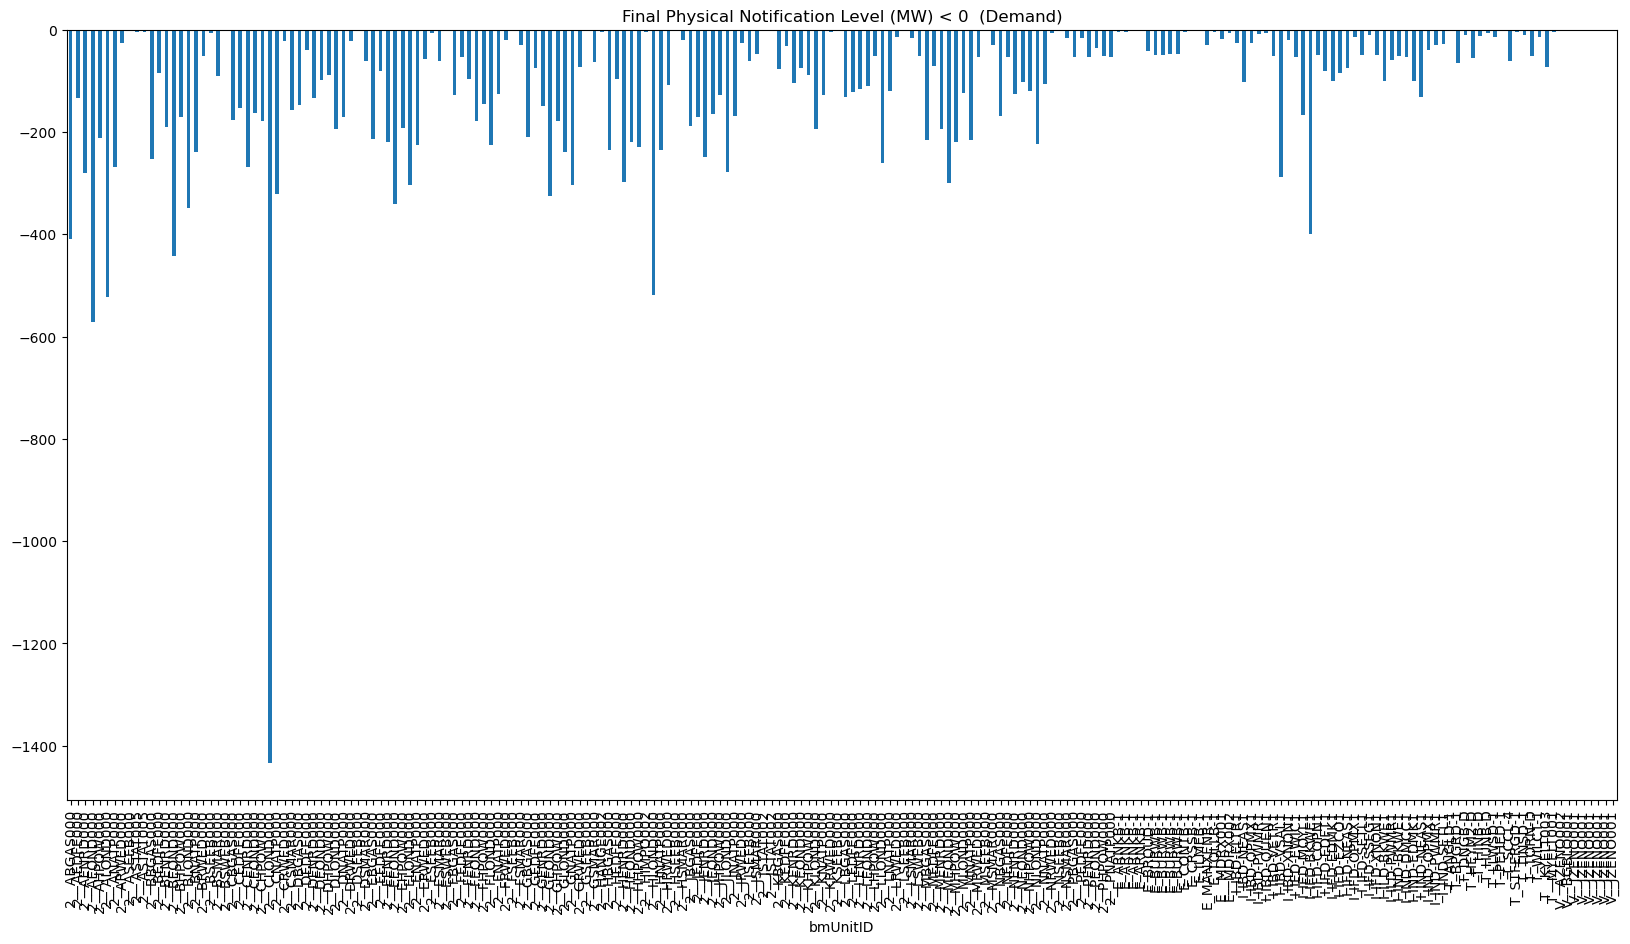

In [35]:
ds_plot[ds_plot < 0].plot(kind='bar', figsize=(20, 10), title='Final Physical Notification Level (MW) < 0  (Demand)')

In [30]:
ds_plot[ds_plot < 0].sum()

-23211.0

<Axes: title={'center': 'Maximum Export Limit (MW)'}, xlabel='bmUnitID'>

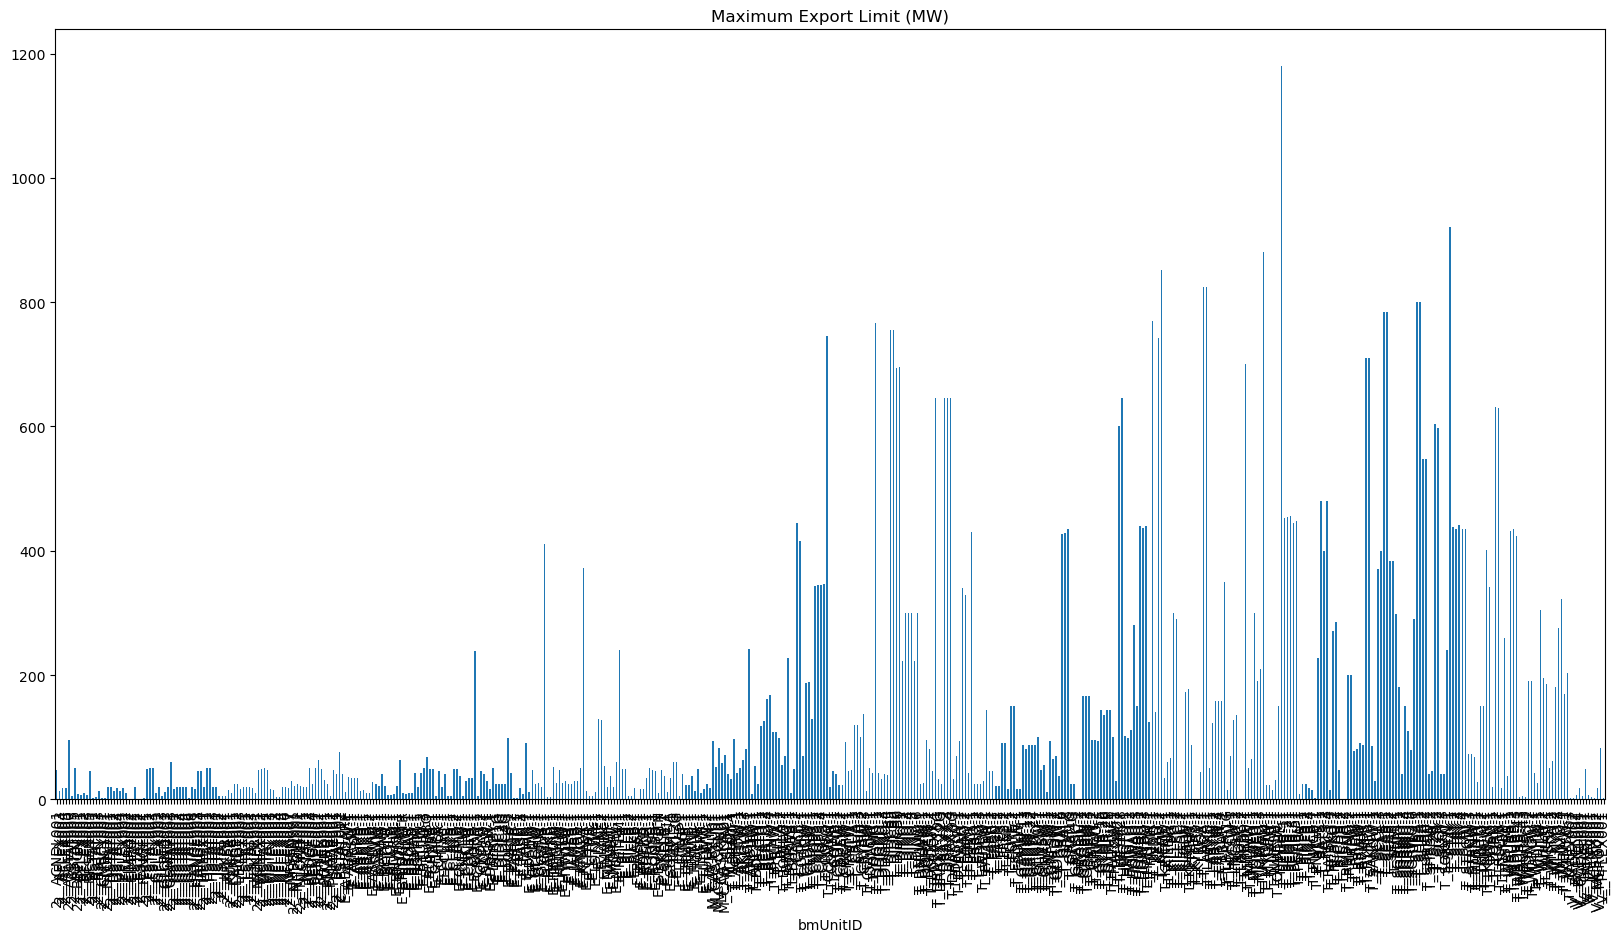

In [36]:
ds_plot_mel = df_data['melLevelTo'].dropna().astype('float')
ds_plot_mel[ds_plot_mel != 0].plot(kind='bar', figsize=(20, 10), title='Maximum Export Limit (MW)')

<Axes: title={'center': 'Maximum Import Limit (MW)'}, xlabel='bmUnitID'>

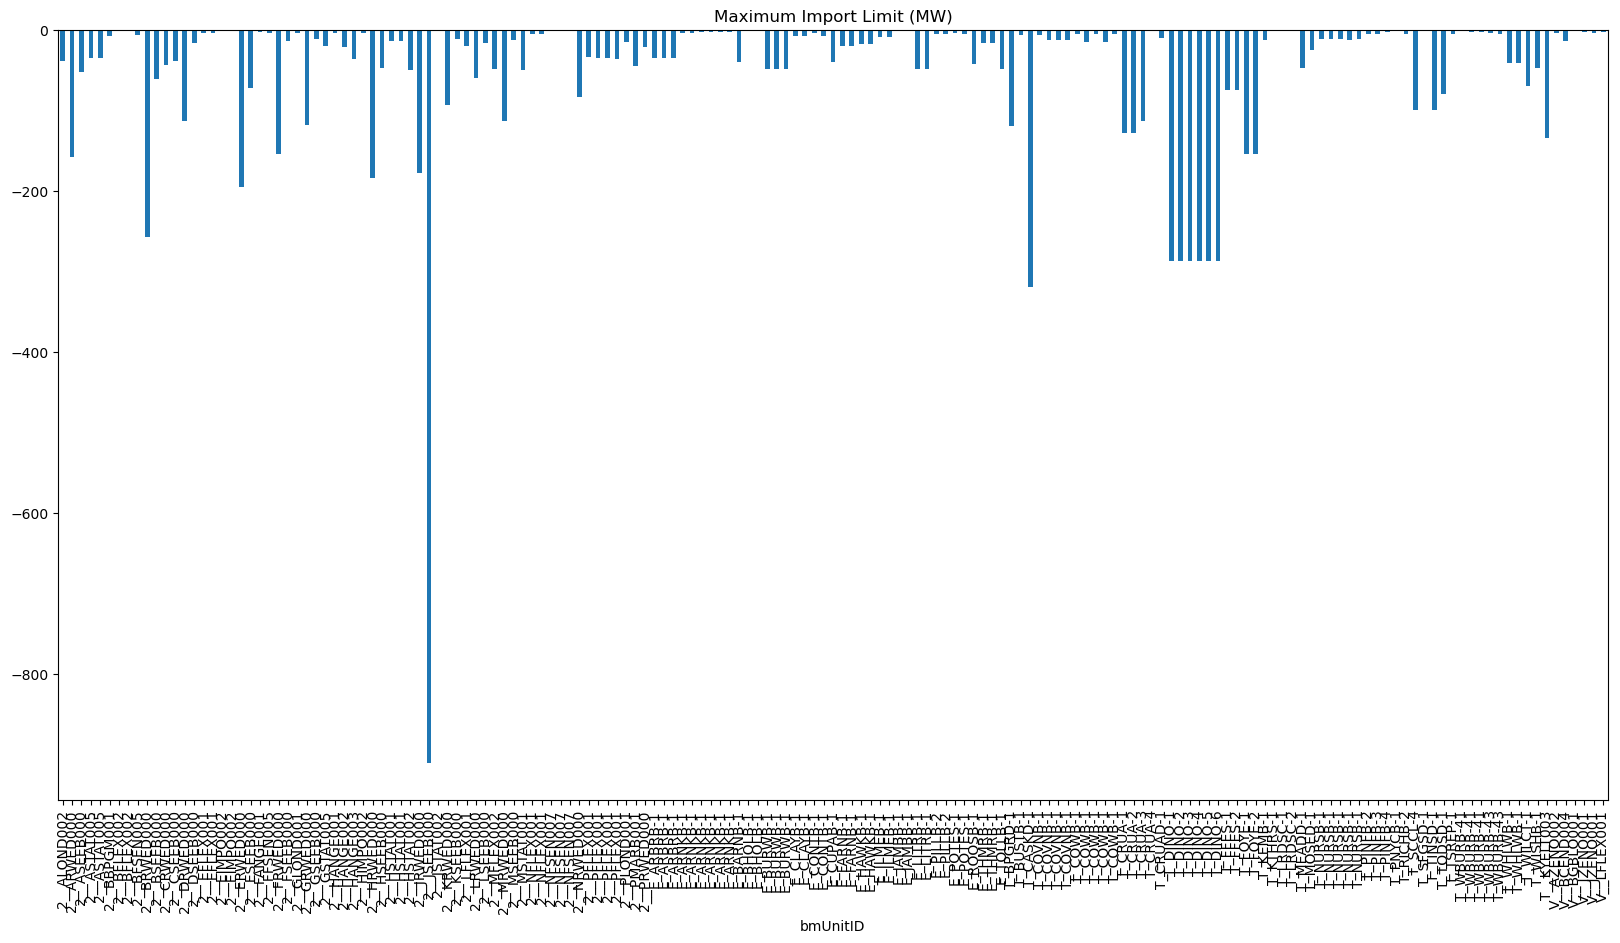

In [37]:
ds_plot_mil = df_data['milLevelTo'].dropna().astype('float')
ds_plot_mil[ds_plot_mil != 0].plot(kind='bar', figsize=(20, 10), title='Maximum Import Limit (MW)')